In [20]:
import pandas as pd
from pathlib import Path
import PC_Fns
import matplotlib.pyplot as plt

In [21]:
wkdir = Path(r"C:\Users\ucasbwh\Desktop\20190809_073916_TB3-1-4")
files_psu = PC_Fns.Find_Files(wkdir, "PSU_Log_*.txt")
print(len(files_psu))

3


In [22]:
hdr = ['Date Time', 'Blank', 'Voltage', 'Current', 'Power', 'Htr. Voltage', 'Htr. Current']
hdr_types = {'Date Time':object}
hdr_types.setdefault("list", 'float64')
skip = [0, 2, 3, 4, 5, 6]

psu_df = pd.DataFrame()

for curfile in files_psu:
    file_df = pd.read_csv(curfile, sep='\t', names=hdr, dtype=hdr_types, usecols=skip, skiprows=1)
    
    if not file_df.empty:
        file_df['DT'] = pd.to_datetime(file_df['Date Time'], format='%d/%m/%Y %H:%M:%S.%f')
        file_df['Power'] = file_df['Voltage'] * file_df['Current']
        psu_df = psu_df.append(file_df, ignore_index=True)
    
psu_df.head(10)

,Date Time,Voltage,Current,Power,Htr. Voltage,Htr. Current,DT
0,09/08/2019 07:39:16.781,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:16.781
1,09/08/2019 07:39:16.969,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:16.969
2,09/08/2019 07:39:17.169,-0.004,0.0,-0.0,-0.009,-0.0,2019-08-09 07:39:17.169
3,09/08/2019 07:39:17.368,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:17.368
4,09/08/2019 07:39:17.569,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:17.569
5,09/08/2019 07:39:17.769,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:17.769
6,09/08/2019 07:39:17.969,-0.003,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:17.969
7,09/08/2019 07:39:18.169,-0.004,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:18.169
8,09/08/2019 07:39:18.369,-0.002,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:18.369
9,09/08/2019 07:39:18.569,-0.002,0.0,-0.0,-0.010,-0.0,2019-08-09 07:39:18.569


In [11]:
psu_df.shape

(41769, 6)

In [12]:
psu_df.dtypes

Date Time        object
Voltage         float64
Current         float64
Power           float64
Htr. Voltage    float64
Htr. Current    float64
dtype: object

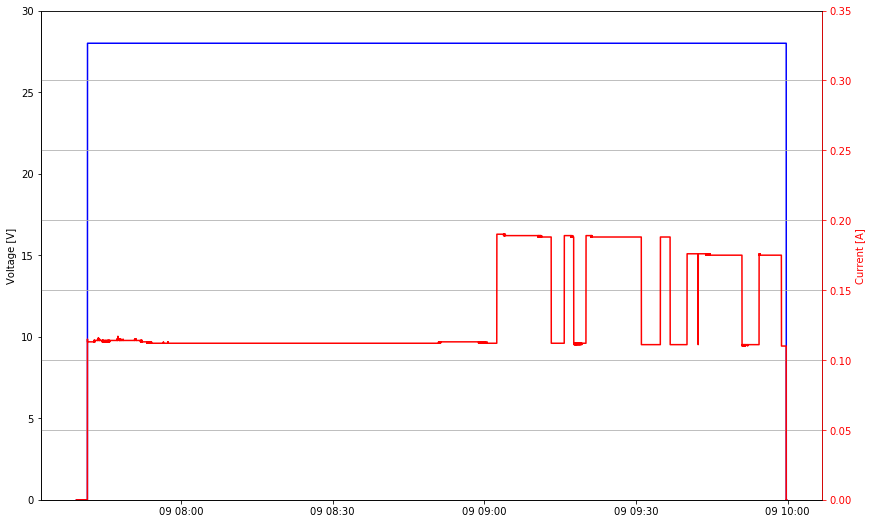

In [19]:
data = psu_df

fig = plt.figure(figsize=(14.0, 9.0))
ax0 = fig.add_subplot(1, 1, 1)
ax1 = ax0.twinx()

ax0.plot(data['DT'], data['Voltage'], 'b-', label='Voltage')
ax0.set_ylabel('Voltage [V]')
ax0.set_ylim(0, 30.0)

ax1.plot(data['DT'], data['Current'], 'r-', label='Current')
ax1.set_ylabel('Current [A]')
ax1.set_ylim(0, 0.35)
ax1.spines['right'].set_color('red')
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')
ax1.grid(True)
